In [104]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import gaussian_kde
import networkx as nx

import seaborn as sns
import jenkspy

In [3]:
data_dir = "../data"

In [4]:
pop_fp = os.path.join(data_dir, "singstat", "sg_population_2015ghs.csv")
pop_df = pd.read_csv(pop_fp)
pop_df.head()

,Subzone,Population
0,Ang Mo Kio Town Centre,5020
1,Cheng San,29770
2,Chong Boon,27900
3,Kebun Bahru,23910
4,Sembawang Hills,6890


In [5]:
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
parea = gpd.read_file("../data/planning-area-2014/MP14_PLNG_AREA_WEB_PL.shp")

In [6]:
subzone_fp = os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp")
subzone = gpd.read_file(subzone_fp)
subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


In [7]:
pop_df["Subzone2"] = pop_df["Subzone"].str.upper()
pop_df.head()

,Subzone,Population,Subzone2
0,Ang Mo Kio Town Centre,5020,ANG MO KIO TOWN CENTRE
1,Cheng San,29770,CHENG SAN
2,Chong Boon,27900,CHONG BOON
3,Kebun Bahru,23910,KEBUN BAHRU
4,Sembawang Hills,6890,SEMBAWANG HILLS


In [8]:
subzone2 = subzone.merge(pop_df, left_on="SUBZONE_N", right_on="Subzone2")
subzone2.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry,Subzone,Population,Subzone2
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671...",Marina South,-,MARINA SOUTH
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006...",Pearl's Hill,8230,PEARL'S HILL
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858...",Boat Quay,180,BOAT QUAY
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709...",Henderson Hill,12870,HENDERSON HILL
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361...",Redhill,12210,REDHILL


In [9]:
subzone2.crs

{'proj': 'tmerc',
 'lat_0': 1.366666666666667,
 'lon_0': 103.8333333333333,
 'k': 1,
 'x_0': 28001.642,
 'y_0': 38744.572,
 'datum': 'WGS84',
 'units': 'm',
 'no_defs': True}

In [10]:
subzone2["area"] = subzone2.area/1000000

In [11]:
subzone2["pop"] = pd.to_numeric(subzone2["Population"], errors='coerce')
subzone2["pop"] = subzone2["pop"].fillna(0)

In [12]:
subzone2["population_density"] = subzone2["pop"] / subzone2["area"]

In [13]:
subzone2[subzone2["population_density"]>0]["population_density"].min(), subzone2["population_density"].max()

(0.26919455097386485, 48556.938935554266)

In [85]:
breaks = jenkspy.jenks_breaks(subzone2[subzone2["population_density"]>0]["population_density"], nb_class=5)
breaks = [ round(v,-3) for v in breaks ]
#breaks[-1] = breaks[-1]+1
breaks#[:-1]

[0.0, 4000.0, 11000.0, 22000.0, 33000.0, 49000.0]

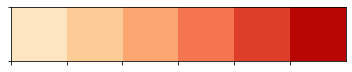

In [122]:
current_palette = sns.color_palette("OrRd")
sns.palplot(current_palette)

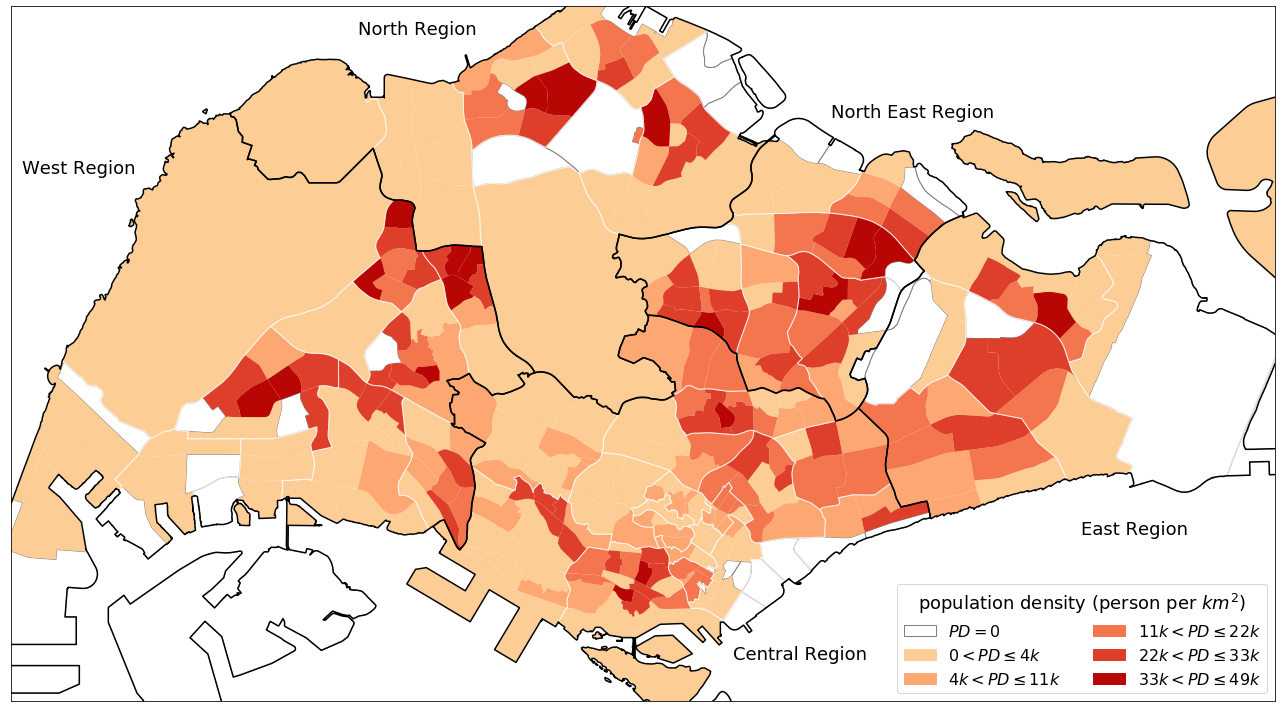

In [123]:
fig, ax = plt.subplots(figsize=(20,10))
#subzone2.plot(column='population_density', cmap='OrRd', ax=ax, legend=True)

patches = []
temp = subzone2[subzone2["population_density"]==0]
temp.plot(fc="white", ax=ax, ec="gray")
lab = "$PD=0$"
pat = mpatches.Patch(color="w", ec="gray", label=lab)
patches.append(pat)

for i in range(len(breaks[:-1])):
    c = current_palette[i+1]
    temp = subzone2[subzone2["population_density"]>breaks[i]]
    temp = temp[temp["population_density"]<=breaks[i+1]]
    temp.plot(fc=c, ax=ax)
    if breaks[i]==0:
        lab = "$0<PD\leq{}k$".format(int(breaks[i+1]/1000))
    else:
        lab = "${}k<PD\leq{}k$".format(int(breaks[i]/1000), int(breaks[i+1]/1000))
    pat = mpatches.Patch(color=c, label=lab)
    patches.append(pat)
leg = ax.legend(handles=patches, ncol=2, fontsize=16, loc="lower right")
leg.set_title("population density (person per $km^2$)", prop={'size':18})

parea.plot(fc="none", ec="white", alpha=.6, ax=ax)
region.plot(fc="none", ec="k", lw=1.5, ax=ax)
ax.annotate("West Region", (9000, 44000), ha="right", fontsize=18)
ax.annotate("North Region", (17000, 49000), ha="left", fontsize=18)
ax.annotate("North East Region", (34000, 46000), ha="left", fontsize=18)
ax.annotate("East Region", (43000, 31000), ha="left", fontsize=18)
ax.annotate("Central Region", (30500, 26500), ha="left", fontsize=18)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
#ax.set_title("Population Density")
plt.tight_layout()
plt.savefig("figs/population_density_map.png", bbox_inches="tight", dpi=100)

In [8]:
flow_df = pd.read_csv("node_density_stat.csv")
flow_df.head()

,node,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650,1273000.0,947890.0,0.002648,0.001322,0.001210
1,AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280,26560.0,24980.0,0.000537,0.000053,0.000034
2,ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518,2725460.0,2034360.0,0.005547,0.000634,0.000833
3,ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026,154940.0,192740.0,0.000763,0.000053,0.000035
4,ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467,8329963.0,7877094.0,0.012875,0.014026,0.017055


In [18]:
flow_df["Subzone2"] = flow_df["node"].str.upper()
flow_df.head()

,node,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend,Subzone2
0,ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650,1273000.0,947890.0,0.002648,0.001322,0.001210,ADMIRALTY
1,AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280,26560.0,24980.0,0.000537,0.000053,0.000034,AIRPORT ROAD
2,ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518,2725460.0,2034360.0,0.005547,0.000634,0.000833,ALEXANDRA HILL
3,ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026,154940.0,192740.0,0.000763,0.000053,0.000035,ALEXANDRA NORTH
4,ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467,8329963.0,7877094.0,0.012875,0.014026,0.017055,ALJUNIED


In [19]:
subzone3 = subzone.merge(flow_df, left_on="SUBZONE_N", right_on="Subzone2")
subzone3.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,...,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend,Subzone2
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,...,110780.0,0.000641,0.000005,0.000006,89240.0,69280.0,0.000950,0.000003,0.000003,MARINA SOUTH
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,...,3785880.0,0.002455,0.000390,0.000289,1048560.0,1464705.0,0.002430,0.000665,0.000443,PEARL'S HILL
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,...,740096.0,0.001550,0.000049,0.000462,585340.0,247860.0,0.001474,0.000069,0.000594,BOAT QUAY
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,...,5378834.0,0.003636,0.000414,0.000273,1686480.0,1950594.0,0.003703,0.000641,0.000444,HENDERSON HILL
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,...,5408407.0,0.004049,0.000453,0.000444,1746518.0,1738553.0,0.003897,0.000560,0.000548,REDHILL


In [20]:
subzone3.columns

Index(['OBJECTID', 'SUBZONE_NO', 'SUBZONE_N', 'SUBZONE_C', 'CA_IND',
       'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N', 'REGION_C', 'INC_CRC',
       'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'node', 'in_degree_weekday', 'out_degree_weekday',
       'PageRank_weekday', 'HITS_hub_weekday', 'HITS_authority_weekday',
       'in_degree_weekend', 'out_degree_weekend', 'PageRank_weekend',
       'HITS_hub_weekend', 'HITS_authority_weekend', 'Subzone2'],
      dtype='object')

In [31]:
len(subzone), len(subzone2), len(subzone3)

(323, 323, 303)

In [35]:
subzone3["area"] = subzone3.area/1000000
subzone3["in_degree_weekday_d"] = subzone3["in_degree_weekday"] / subzone3["area"]

In [36]:
breaks = jenkspy.jenks_breaks(subzone3["in_degree_weekday_d"], nb_class=6)
breaks = [np.floor(breaks[0]/1000)*1000]+[ round(v,-3) for v in breaks[1:] ]
#breaks[-1] = breaks[-1]+1
breaks#[:-1]

[8000.0, 3054000.0, 6843000.0, 13418000.0, 22422000.0, 33482000.0, 50063000.0]

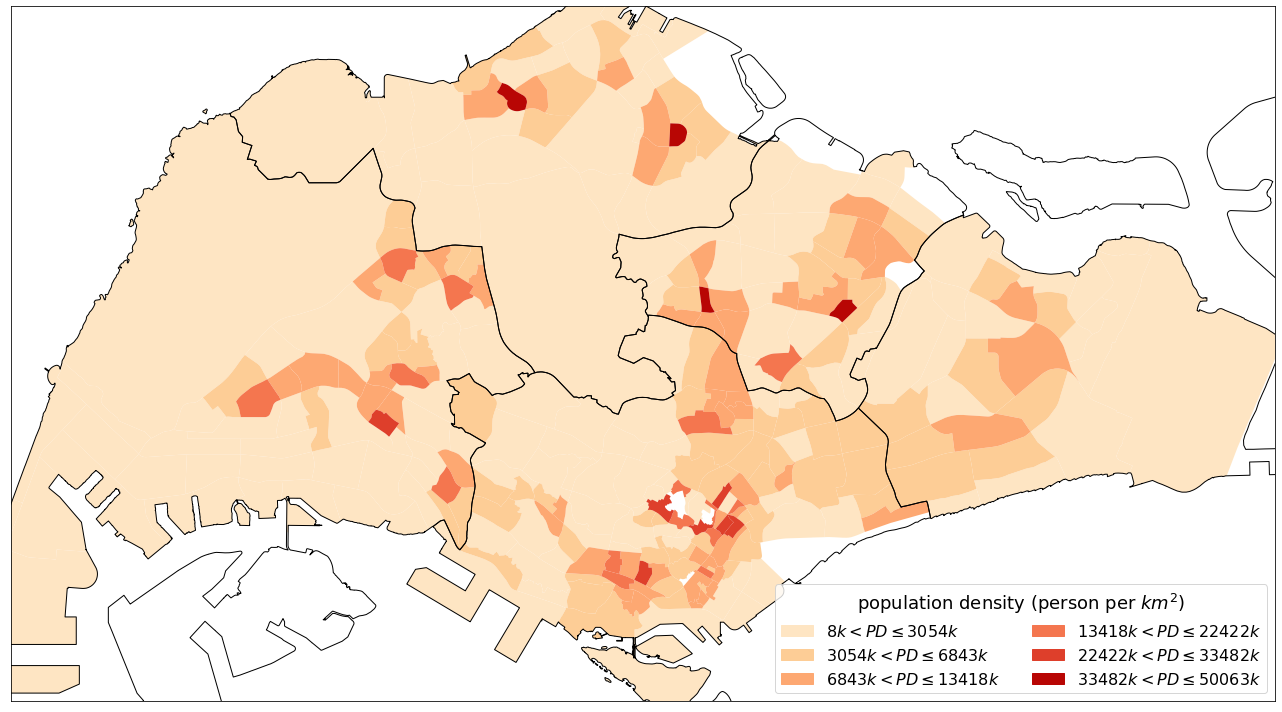

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
#subzone2.plot(column='population_density', cmap='OrRd', ax=ax, legend=True)
parea.plot(fc="none", ec="white", alpha=.6, ax=ax)
col = "in_degree_weekday_d"
patches = []

for i in range(len(breaks[:-1])):
    c = current_palette[i]
    if i==0:
        temp = subzone3[subzone3[col]>=breaks[i]]
    else:
        temp = subzone3[subzone3[col]>breaks[i]]
    temp = temp[temp[col]<=breaks[i+1]]
    temp.plot(fc=c, ax=ax)
    if breaks[i]==0:
        lab = "${}\leqPD\leq{}k$".format(int(breaks[i]/1000), int(breaks[i+1]/1000))
    else:
        lab = "${}k<PD\leq{}k$".format(int(breaks[i]/1000), int(breaks[i+1]/1000))
    pat = mpatches.Patch(color=c, label=lab)
    patches.append(pat)
leg = ax.legend(handles=patches, ncol=2, fontsize=16, loc="lower right")
leg.set_title("population density (person per $km^2$)", prop={'size':18})

region.plot(fc="none", ec="k", ax=ax)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
#ax.set_title("Population Density")
plt.tight_layout()
#plt.savefig("figs/population_density_map.png", bbox_inches="tight", dpi=100)

In [10]:
pos_df = pd.read_csv(os.path.join(data_dir, "subzone_centroid.csv"), index_col=0)
pos_df.head()

,sub_zone,xx,yy
ind,,,
0,MARINA SOUTH,31595.835746,29220.187377
1,PEARL'S HILL,28679.063482,29782.051966
2,BOAT QUAY,29654.959448,29974.655356
3,HENDERSON HILL,26782.826115,29933.765194
4,REDHILL,26201.958019,30005.703511


In [11]:
flow_df.head()

,node,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650,1273000.0,947890.0,0.002648,0.001322,0.001210
1,AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280,26560.0,24980.0,0.000537,0.000053,0.000034
2,ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518,2725460.0,2034360.0,0.005547,0.000634,0.000833
3,ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026,154940.0,192740.0,0.000763,0.000053,0.000035
4,ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467,8329963.0,7877094.0,0.012875,0.014026,0.017055


In [12]:
flow_df2 = flow_df.merge(pos_df, left_on="node", right_on="sub_zone")
print(len(flow_df), len(flow_df2))
flow_df2.head()

303 303


,node,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend,sub_zone,xx,yy
0,ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650,1273000.0,947890.0,0.002648,0.001322,0.001210,ADMIRALTY,27091.275536,48333.800595
1,AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280,26560.0,24980.0,0.000537,0.000053,0.000034,AIRPORT ROAD,35133.315461,37075.318444
2,ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518,2725460.0,2034360.0,0.005547,0.000634,0.000833,ALEXANDRA HILL,25358.820869,29991.384228
3,ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026,154940.0,192740.0,0.000763,0.000053,0.000035,ALEXANDRA NORTH,26548.250741,30519.392217
4,ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467,8329963.0,7877094.0,0.012875,0.014026,0.017055,ALJUNIED,33592.575976,32970.830165


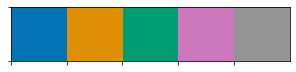

In [13]:

current_palette = sns.color_palette("colorblind", 8)
current_palette = [ current_palette[i] for i in [0,1,2,4,7]]
sns.palplot(current_palette)

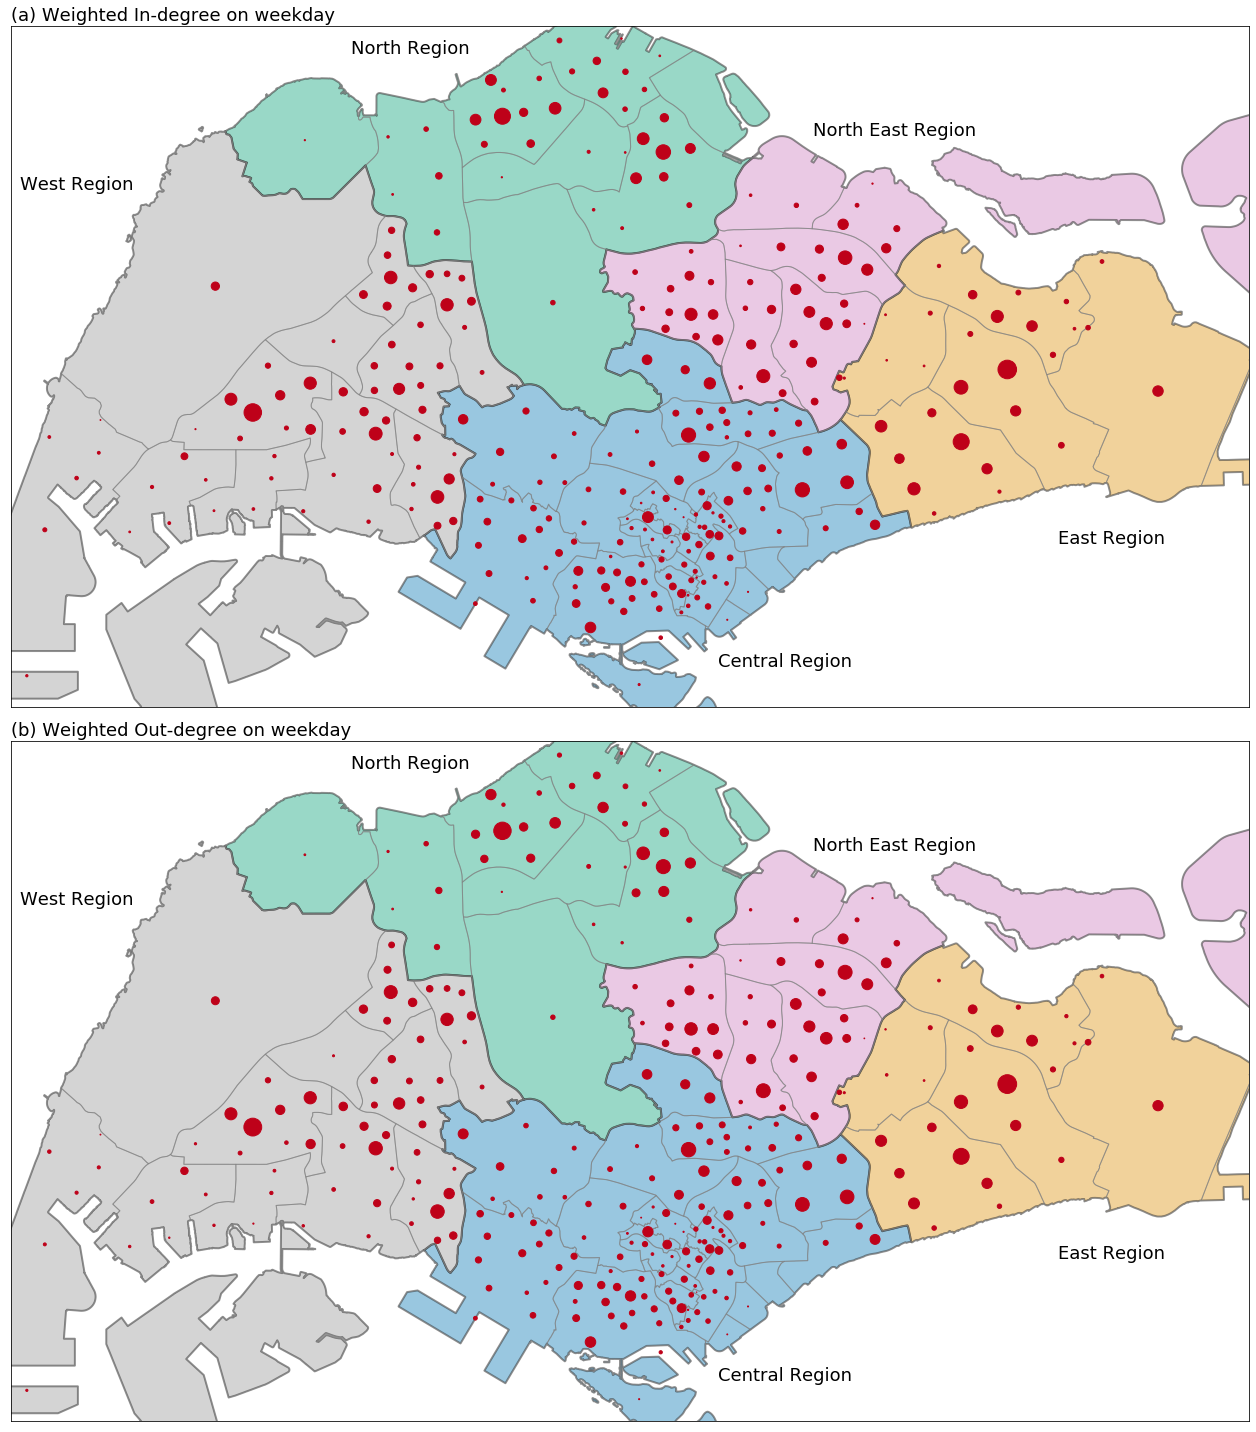

In [119]:
fig, axs = plt.subplots(2,1, figsize=(20,20))
#subzone2.plot(column='population_density', cmap='OrRd', ax=ax, legend=True)

ax = axs[0]
col = "in_degree_weekday"
newcmp = ListedColormap(current_palette)
#subzone.plot(fc="xkcd:light gray", ec="white", alpha=.6, ax=ax)
region.plot(column="REGION_N", ec="k", lw=2., ax=ax, cmap=newcmp, alpha=.4)
#subzone.plot(fc="none", ec="none", alpha=.6, ax=ax)
parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
ax.annotate("West Region", (9000, 44000), ha="right", fontsize=18)
ax.annotate("North Region", (17000, 49000), ha="left", fontsize=18)
ax.annotate("North East Region", (34000, 46000), ha="left", fontsize=18)
ax.annotate("East Region", (43000, 31000), ha="left", fontsize=18)
ax.annotate("Central Region", (30500, 26500), ha="left", fontsize=18)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("(a) Weighted In-degree on weekday", loc="left", fontsize=18)

ax = axs[1]
col = "out_degree_weekday"
newcmp = ListedColormap(current_palette)
region.plot(column="REGION_N", ec="k", lw=2., ax=ax, cmap=newcmp, alpha=.4)
parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
ax.annotate("West Region", (9000, 44000), ha="right", fontsize=18)
ax.annotate("North Region", (17000, 49000), ha="left", fontsize=18)
ax.annotate("North East Region", (34000, 46000), ha="left", fontsize=18)
ax.annotate("East Region", (43000, 31000), ha="left", fontsize=18)
ax.annotate("Central Region", (30500, 26500), ha="left", fontsize=18)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("(b) Weighted Out-degree on weekday", loc="left", fontsize=18)

plt.tight_layout()
plt.savefig("figs/flow_weekday_map.png", bbox_inches="tight", dpi=100)

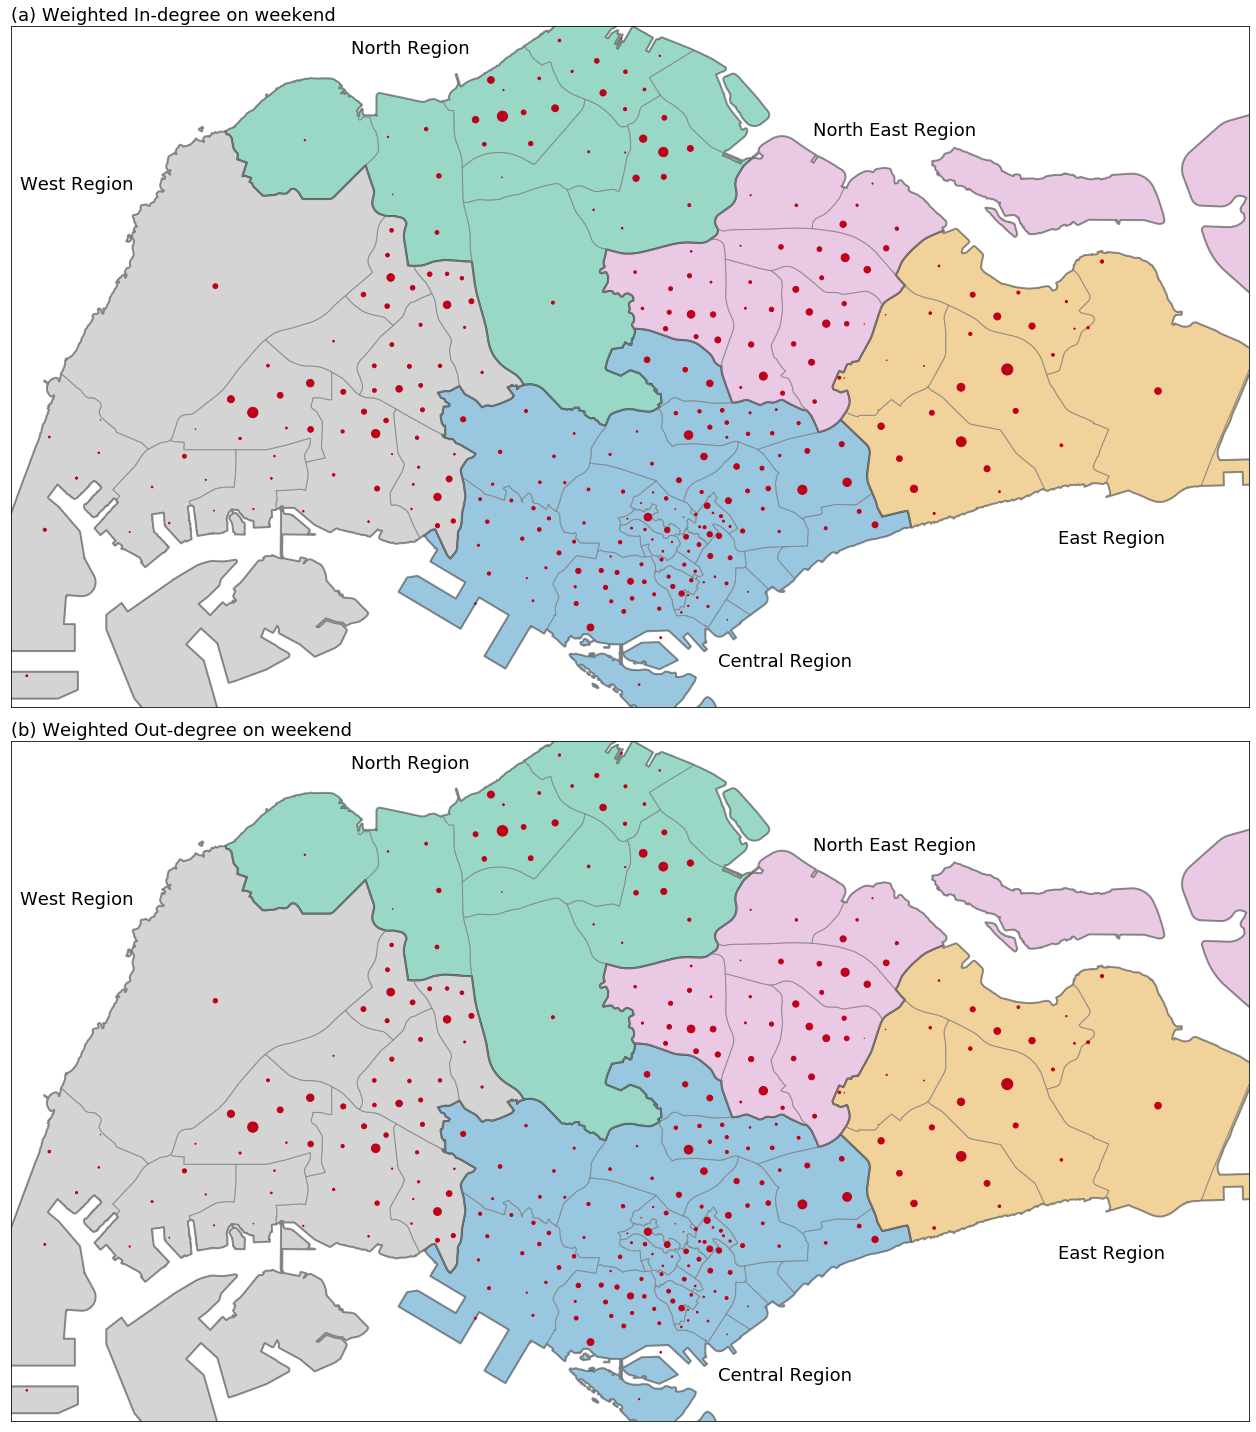

In [120]:
fig, axs = plt.subplots(2,1, figsize=(20,20))
#subzone2.plot(column='population_density', cmap='OrRd', ax=ax, legend=True)

ax = axs[0]
col = "in_degree_weekend"
newcmp = ListedColormap(current_palette)
#subzone.plot(fc="xkcd:light gray", ec="white", alpha=.6, ax=ax)
region.plot(column="REGION_N", ec="k", lw=2., ax=ax, cmap=newcmp, alpha=.4)
#subzone.plot(fc="none", ec="none", alpha=.6, ax=ax)
parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
ax.annotate("West Region", (9000, 44000), ha="right", fontsize=18)
ax.annotate("North Region", (17000, 49000), ha="left", fontsize=18)
ax.annotate("North East Region", (34000, 46000), ha="left", fontsize=18)
ax.annotate("East Region", (43000, 31000), ha="left", fontsize=18)
ax.annotate("Central Region", (30500, 26500), ha="left", fontsize=18)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("(a) Weighted In-degree on weekend", loc="left", fontsize=18)

ax = axs[1]
col = "out_degree_weekend"
newcmp = ListedColormap(current_palette)
region.plot(column="REGION_N", ec="k", lw=2., ax=ax, cmap=newcmp, alpha=.4)
parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
ax.annotate("West Region", (9000, 44000), ha="right", fontsize=18)
ax.annotate("North Region", (17000, 49000), ha="left", fontsize=18)
ax.annotate("North East Region", (34000, 46000), ha="left", fontsize=18)
ax.annotate("East Region", (43000, 31000), ha="left", fontsize=18)
ax.annotate("Central Region", (30500, 26500), ha="left", fontsize=18)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("(b) Weighted Out-degree on weekend", loc="left", fontsize=18)

plt.tight_layout()
plt.savefig("figs/flow_weekend_map.png", bbox_inches="tight", dpi=100)

draw kde weighting by in/out degree

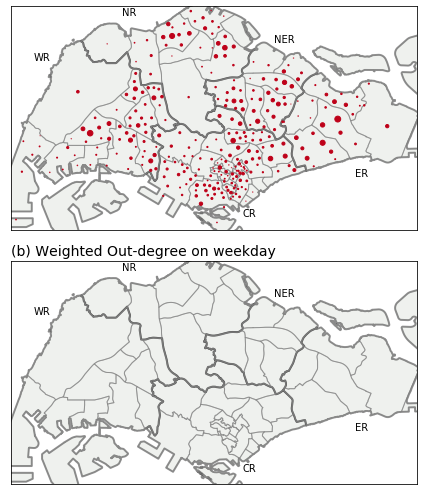

In [130]:
fig, axs = plt.subplots(2,1, figsize=(7,7))
#subzone2.plot(column='population_density', cmap='OrRd', ax=ax, legend=True)

ax = axs[0]
col = "in_degree_weekday"
region.plot(fc="xkcd:light grey", ec="k", lw=2., ax=ax, alpha=.4)
parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/1000000 for s in flow_df2[col] ], c="xkcd:scarlet")
ax.annotate("WR", (9000, 44000), ha="right", fontsize=10)
ax.annotate("NR", (17000, 49000), ha="left", fontsize=10)
ax.annotate("NER", (34000, 46000), ha="left", fontsize=10)
ax.annotate("ER", (43000, 31000), ha="left", fontsize=10)
ax.annotate("CR", (30500, 26500), ha="left", fontsize=10)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
#ax.set_title("(a) Weighted In-degree on weekday", loc="left", fontsize=14)

ax = axs[1]
col = "out_degree_weekday"
region.plot(fc="xkcd:light grey", ec="k", lw=2., ax=ax, alpha=.4)
parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
#ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
ax.annotate("WR", (9000, 44000), ha="right", fontsize=10)
ax.annotate("NR", (17000, 49000), ha="left", fontsize=10)
ax.annotate("NER", (34000, 46000), ha="left", fontsize=10)
ax.annotate("ER", (43000, 31000), ha="left", fontsize=10)
ax.annotate("CR", (30500, 26500), ha="left", fontsize=10)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("(b) Weighted Out-degree on weekday", loc="left", fontsize=14)

plt.tight_layout()
#plt.savefig("figs/flow_weekday_map.png", bbox_inches="tight", dpi=100)

In [25]:

col = "in_degree_weekday"
pts = np.array(list(zip(flow_df2["xx"], flow_df2["yy"]))).T#.shape
ws = np.array(flow_df2[col].tolist()).T
ws.shape, pts.shape

((303,), (2, 303))

In [26]:
gkde = gaussian_kde(pts, weights=ws)


In [41]:
xlim = [4500,50000]
ylim = [25000,50000]
xr = np.arange(xlim[0], xlim[1], 10)
yr = np.arange(ylim[0], ylim[1], 10)
xx, yy = np.meshgrid(xr, yr)
#pts2 = np.array(list(zip(xx, yy))).T
#pts2.shape
xx.shape

(2500, 4550)

In [42]:
positions = np.vstack([xx.ravel(), yy.ravel()])
f = np.reshape(gkde(positions).T, xx.shape)

In [75]:
xlim = [4500,50000]
ylim = [25000,50000]
xr = np.arange(xlim[0], xlim[1], 10)
yr = np.arange(ylim[0], ylim[1], 10)
xx, yy = np.meshgrid(xr, yr)
positions = np.vstack([xx.ravel(), yy.ravel()])
pts = np.array(list(zip(flow_df2["xx"], flow_df2["yy"]))).T#.shape

In [77]:
col1 = "in_degree_weekday"
ws1 = np.array(flow_df2[col1].tolist()).T
gkde1 = gaussian_kde(pts, weights=ws1)
f1 = np.reshape(gkde1(positions).T, xx.shape)

In [78]:
col2 = "out_degree_weekday"
ws2 = np.array(flow_df2[col2].tolist()).T
gkde2 = gaussian_kde(pts, weights=ws2)
f2 = np.reshape(gkde2(positions).T, xx.shape)

In [79]:
col3 = "in_degree_weekend"
ws3 = np.array(flow_df2[col3].tolist()).T
gkde3 = gaussian_kde(pts, weights=ws3)
f3 = np.reshape(gkde3(positions).T, xx.shape)

In [80]:
col4 = "out_degree_weekend"
ws4 = np.array(flow_df2[col4].tolist()).T
gkde4 = gaussian_kde(pts, weights=ws4)
f4 = np.reshape(gkde4(positions).T, xx.shape)

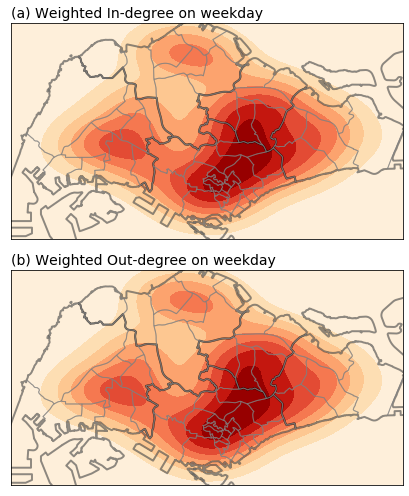

In [81]:
fig, axs = plt.subplots(2,1, figsize=(7,7))
ax = axs[0]
cfset = ax.contourf(xx, yy, f1, cmap='OrRd')
#ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
#cset = ax.contour(xx, yy, f, colors='k')
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_title("(a) Weighted In-degree on weekday", loc="left", fontsize=14)

ax = axs[1]
cfset = ax.contourf(xx, yy, f2, cmap='OrRd')
#ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
#cset = ax.contour(xx, yy, f, colors='k')
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_title("(b) Weighted Out-degree on weekday", loc="left", fontsize=14)

for ax in axs:
    ax.set_aspect("equal")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    region.plot(fc="none", ec="k", lw=2., ax=ax, alpha=.4)
    parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

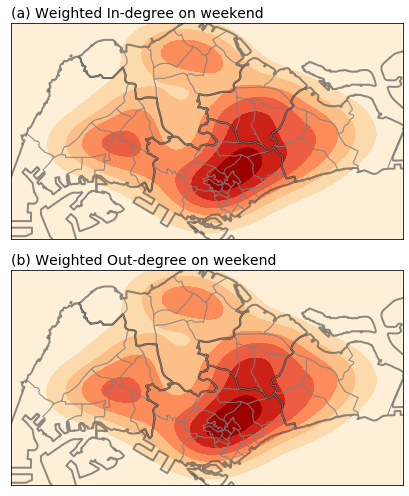

In [82]:
fig, axs = plt.subplots(2,1, figsize=(7,7))
ax = axs[0]
cfset = ax.contourf(xx, yy, f3, cmap='OrRd')
#ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
#cset = ax.contour(xx, yy, f, colors='k')
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_title("(a) Weighted In-degree on weekend", loc="left", fontsize=14)

ax = axs[1]
cfset = ax.contourf(xx, yy, f4, cmap='OrRd')
#ax.scatter(flow_df2["xx"], flow_df2["yy"], s=[ s/100000 for s in flow_df2[col] ], c="xkcd:scarlet")
#cset = ax.contour(xx, yy, f, colors='k')
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_title("(b) Weighted Out-degree on weekend", loc="left", fontsize=14)

for ax in axs:
    ax.set_aspect("equal")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    region.plot(fc="none", ec="k", lw=2., ax=ax, alpha=.4)
    parea.plot(fc="none", ec="gray", alpha=.6, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

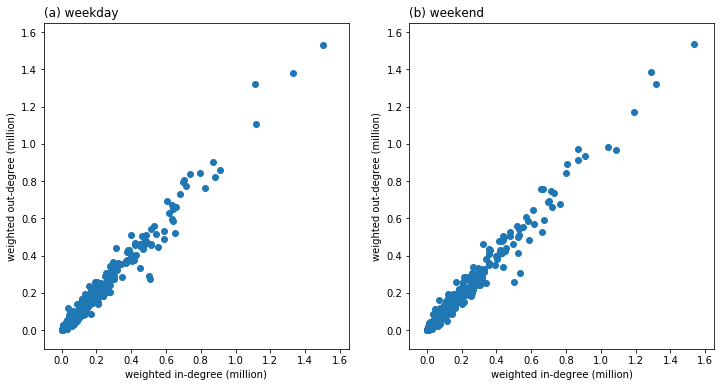

In [101]:
fig, axs = plt.subplots(1,2, figsize=(12,6), sharey=False, sharex=False)
ax1, ax2 = axs

x1 = flow_df2["in_degree_weekday"].tolist()
y1 = flow_df2["out_degree_weekday"].tolist()
x2 = flow_df2["in_degree_weekend"].tolist()
y2 = flow_df2["out_degree_weekend"].tolist()

ax1.scatter([x/1000000/23 for x in x1], [y/1000000/23 for y in y1]) #23 weekday days in Jan 2020
ax2.scatter([x/1000000/8 for x in x2], [y/1000000/8 for y in y2]) # 8 weekend days in Jan 2020

ax1.set_title("(a) weekday", loc="left")
ax2.set_title("(b) weekend", loc="left")

for ax in axs:
    ax.set_xlabel("weighted in-degree (million)")
    ax.set_ylabel("weighted out-degree (million)")
    ax.set_xlim([-0.1, 1.65])
    ax.set_ylim([-0.1, 1.65])

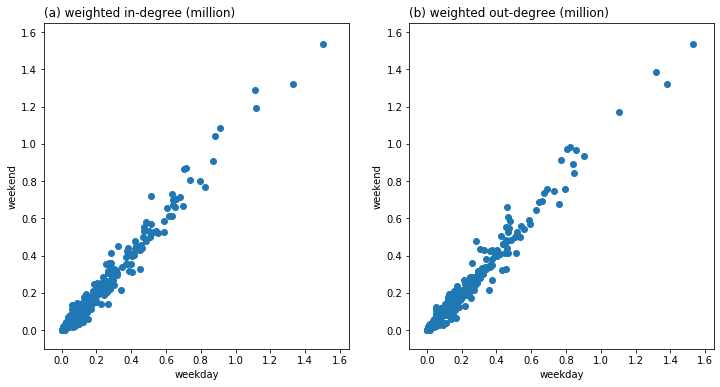

In [102]:
fig, axs = plt.subplots(1,2, figsize=(12,6), sharey=False, sharex=False)
ax1, ax2 = axs

x1 = flow_df2["in_degree_weekday"].tolist()
y1 = flow_df2["out_degree_weekday"].tolist()
x2 = flow_df2["in_degree_weekend"].tolist()
y2 = flow_df2["out_degree_weekend"].tolist()

ax1.scatter([x/1000000/23 for x in x1], [x/1000000/8 for x in x2]) #23 weekday days in Jan 2020
ax2.scatter([y/1000000/23 for y in y1], [y/1000000/8 for y in y2]) # 8 weekend days in Jan 2020

ax1.set_xlabel("")
ax1.set_ylabel("weighted in-degree (million)")
ax2.set_xlabel("weighted out-degree (million)")
ax2.set_ylabel("weighted out-degree (million)")

ax1.set_title("(a) weighted in-degree (million)", loc="left")
ax2.set_title("(b) weighted out-degree (million)", loc="left")

for ax in axs:
    ax.set_xlabel("weekday")
    ax.set_ylabel("weekend")
    ax.set_xlim([-0.1, 1.65])
    ax.set_ylim([-0.1, 1.65])

In [106]:
dg1 = nx.read_pajek(os.path.join(data_dir, "net_202001_weekday.net"))
dg2 = nx.read_pajek(os.path.join(data_dir, "net_202001_weekend.net"))

In [131]:
deg1 = dict(dg1.in_degree(weight=None))
deg2 = dict(dg2.in_degree(weight=None))
deg1b = dict(dg1.out_degree(weight=None))
deg2b = dict(dg2.out_degree(weight=None))

deg1c = dict(dg1.in_degree(weight="weight"))
deg2c = dict(dg2.in_degree(weight="weight"))
deg1d = dict(dg1.out_degree(weight="weight"))
deg2d = dict(dg2.out_degree(weight="weight"))

In [136]:
simple_degree = pd.DataFrame.from_dict({"weekday_indeg": deg1, "weekend_indeg":deg2, "weekday_outdeg": deg1b, "weekend_outdeg": deg2b, 
                                        "weekday_windeg": deg1c, "weekend_windeg":deg2c, "weekday_woutdeg": deg1d, "weekend_woutdeg": deg2d, })
simple_degree["weekday_windeg"] = simple_degree["weekday_windeg"]/23
simple_degree["weekend_windeg"] = simple_degree["weekend_windeg"]/8
simple_degree["weekday_woutdeg"] = simple_degree["weekday_woutdeg"]/23
simple_degree["weekend_woutdeg"] = simple_degree["weekend_woutdeg"]/8


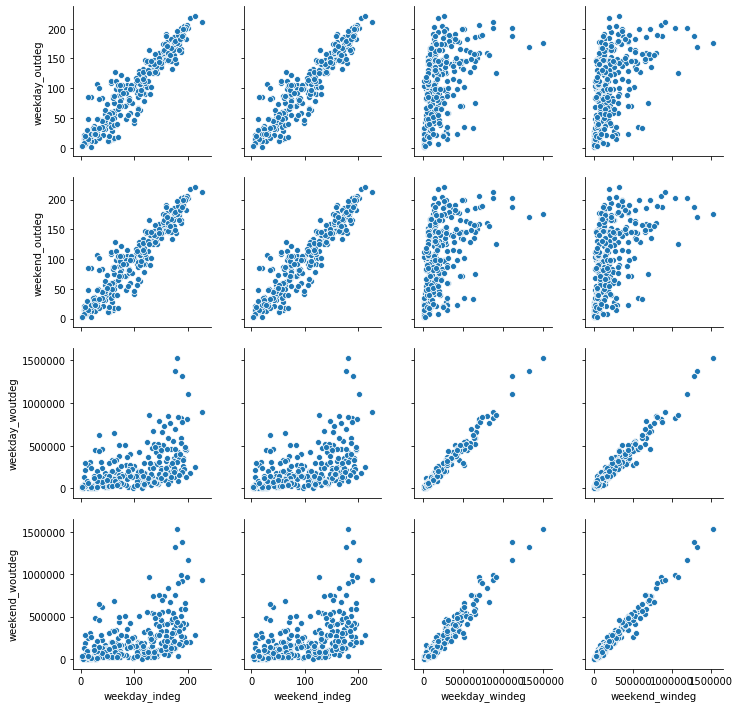

In [137]:
sns.pairplot(x_vars=[ col for col in simple_degree.columns if "indeg" in col ], y_vars=[ col for col in simple_degree.columns if "outdeg" in col ], data=simple_degree)

In [141]:
simple_degree.head()

,weekday_indeg,weekend_indeg,weekday_outdeg,weekend_outdeg,weekday_windeg,weekend_windeg,weekday_woutdeg,weekend_woutdeg
ADMIRALTY,58,58,41,41,130508.695652,159125.000,99038.478261,118486.25
AIRPORT ROAD,10,10,10,10,20146.086957,3320.000,18621.739130,3122.50
ALEXANDRA HILL,139,139,141,141,345943.478261,340682.500,286184.043478,254295.00
ALEXANDRA NORTH,52,52,48,48,27331.304348,19367.500,41490.434783,24092.50
ALJUNIED,188,188,202,202,880462.347826,1041245.375,821496.434783,984636.75


In [163]:
[ i*13 for i in range(21) ]

[0,
 13,
 26,
 39,
 52,
 65,
 78,
 91,
 104,
 117,
 130,
 143,
 156,
 169,
 182,
 195,
 208,
 221,
 234,
 247,
 260]

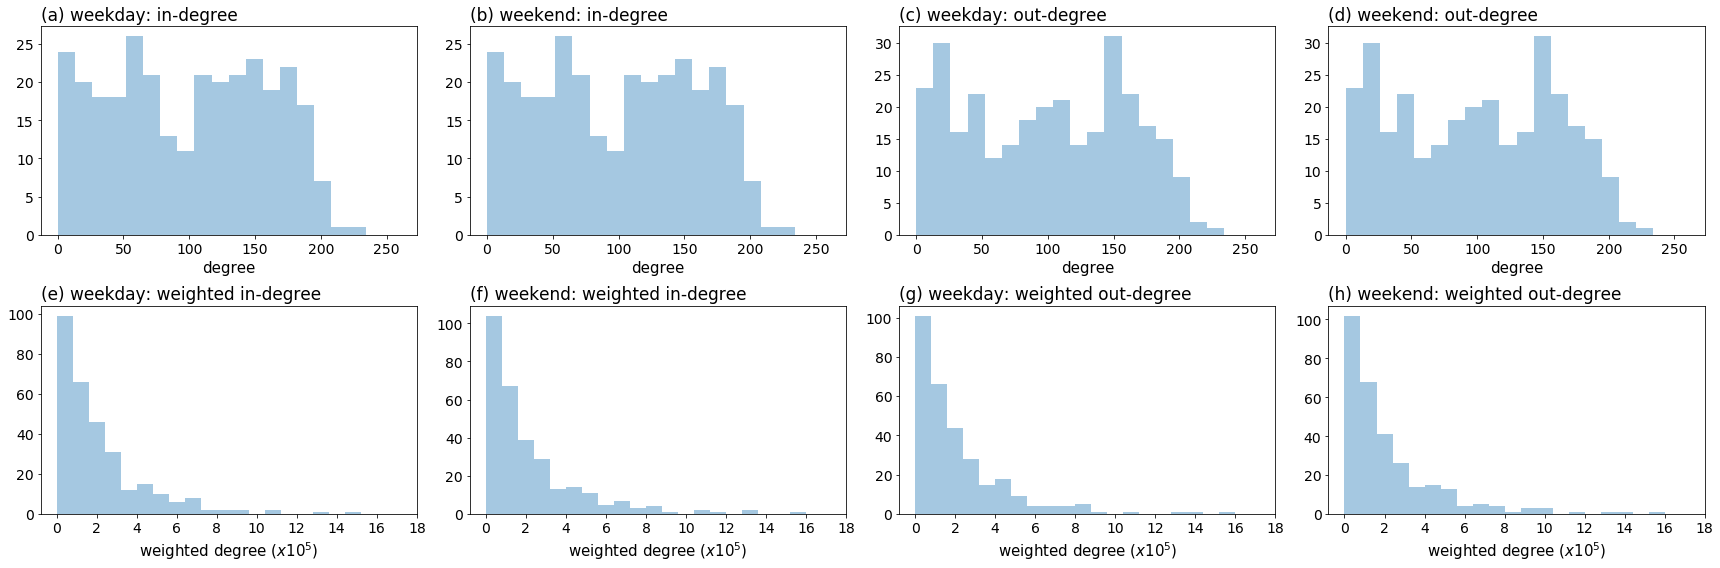

In [197]:
fig, axg = plt.subplots(2, 4,figsize=(24,8))
axs = axg.flatten()
#bins = 
labs = "abcdefgh"
labs2 = ["weekday: in-degree", "weekend: in-degree", "weekday: out-degree", "weekend: out-degree", 
        "weekday: weighted in-degree", "weekend: weighted in-degree", "weekday: weighted out-degree", "weekend: weighted out-degree"]
for i in range(8):
    ax = axs[i]
    col = simple_degree.columns[i]
    if i<4:
        bins = [ i*13 for i in range(21) ]
    else:
        bins = [ i*80000 for i in range(21) ]
        #bins = 20
    sns.distplot(simple_degree[col], kde=False, ax=ax, bins=bins)
    if i>=4:
        ax.set_xticks([ i*200000 for i in range(10)])
        ax.set_xticklabels([ i*2 for i in range(10) ])
        ax.set_xlabel("weighted degree ($ x 10^5$)", fontsize=15)
    else:
        ax.set_xlabel("degree", fontsize=15)
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left", fontsize=17)
    #ax.set_ylabel("frequency", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=14) 
    ax.tick_params(axis='both', which='minor', labelsize=14)

plt.tight_layout()

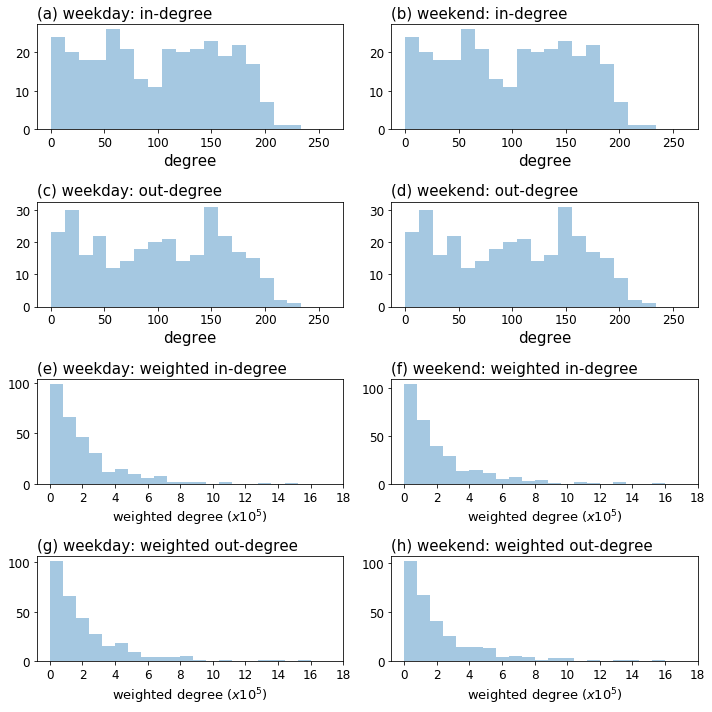

In [198]:
fig, axg = plt.subplots(4, 2, figsize=(10,10))
axs = axg.flatten()
#bins = 
labs = "abcdefgh"
labs2 = ["weekday: in-degree", "weekend: in-degree", "weekday: out-degree", "weekend: out-degree", 
        "weekday: weighted in-degree", "weekend: weighted in-degree", "weekday: weighted out-degree", "weekend: weighted out-degree"]
for i in range(8):
    ax = axs[i]
    col = simple_degree.columns[i]
    if i<4:
        bins = [ i*13 for i in range(21) ]
    else:
        bins = [ i*80000 for i in range(21) ]
        #bins = 20
    sns.distplot(simple_degree[col], kde=False, ax=ax, bins=bins)
    if i>=4:
        ax.set_xticks([ i*200000 for i in range(10)])
        ax.set_xticklabels([ i*2 for i in range(10) ])
        ax.set_xlabel("weighted degree ($ x 10^5$)", fontsize=13)
    else:
        ax.set_xlabel("degree", fontsize=15)
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left", fontsize=15)
    #ax.set_ylabel("frequency", fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12) 
    ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.savefig("figs/degree_centralities.png", dpi=100, bbox_inches="tight")

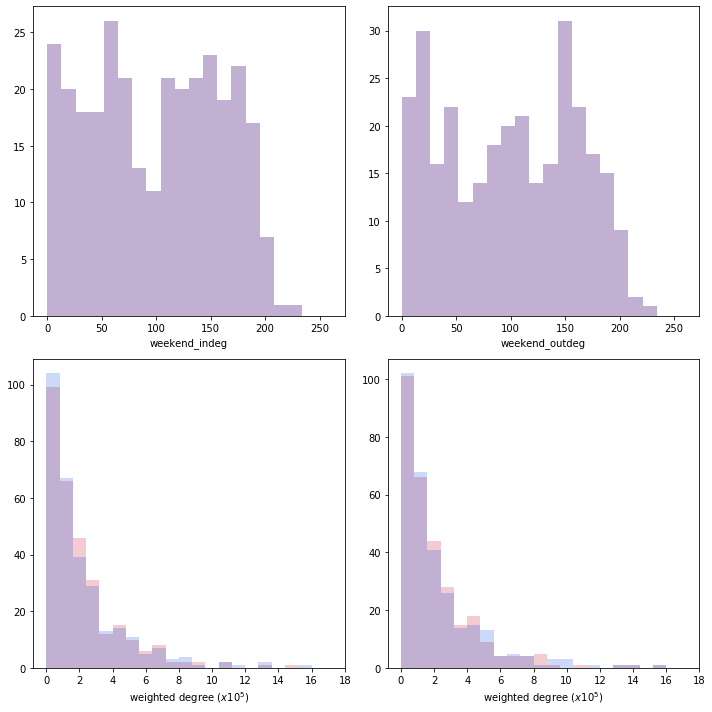

In [176]:
fig, axg = plt.subplots(2, 2,figsize=(10,10))
axs = axg.flatten()
#bins = 
colors = ["xkcd:scarlet", "xkcd:blue"]
for i in range(8):
    ax = axs[int(i/2)]
    col = simple_degree.columns[i]
    if i<4:
        bins = [ i*13 for i in range(21) ]
    else:
        bins = [ i*80000 for i in range(21) ]
        #bins = 20
    sns.distplot(simple_degree[col], kde=False, ax=ax, bins=bins, 
                 hist_kws={"histtype": "bar", "linewidth": 0.1,
                            "alpha": .2, "color": colors[i%2]})
    if i>=4:
        ax.set_xticks([ i*200000 for i in range(10)])
        ax.set_xticklabels([ i*2 for i in range(10) ])
        ax.set_xlabel("weighted degree ($ x 10^5$)")

plt.tight_layout()